In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import spline
import scipy.stats as stats
from matplotlib.ticker import LinearLocator, FormatStrFormatter

path = 'exp_results/'
VLD = 'valid_accs.npy'
CMP = 'comp_ps.npy'
NONE_RSTV = 'test_none_valid/'
LIST_RSTV = 'test_only_listener_valid/'
SPKE_RSTV = 'test_only_speaker_valid/'
BOTH_RSTV = 'test_both_valid/'
BOTH_RST2V = 'test_both_valid_shortphA/'


In [2]:
VLD_none = np.load(path+NONE_RSTV+VLD).reshape(80,200)
#VLD_list = np.load(path+LIST_RSTV+VLD).reshape(80,200)
#VLD_spke = np.load(path+SPKE_RSTV+VLD).reshape(80,200)
VLD_both = np.load(path+BOTH_RSTV+VLD).reshape(80,200)
VLD_both2 = np.load(path+BOTH_RST2V+VLD).reshape(80,200)

CMP_none = np.load(path+NONE_RSTV+CMP).reshape(80,200)
#CMP_list = np.load(path+LIST_RSTV+CMP).reshape(80,200)
#CMP_spke = np.load(path+SPKE_RSTV+CMP).reshape(80,200)
CMP_both = np.load(path+BOTH_RSTV+CMP).reshape(80,200)
CMP_both2 = np.load(path+BOTH_RST2V+CMP).reshape(80,200)

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


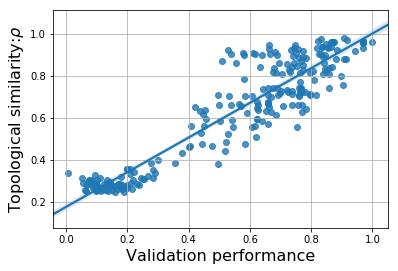

In [48]:
valid_all = np.concatenate((VLD_none.mean(1),VLD_both.mean(1),VLD_both2.mean(1)))
comps_all = np.concatenate((CMP_none.mean(1),CMP_both.mean(1),CMP_both2.mean(1)))

dict_valid_comp = {
    'Validation':valid_all,
    'Rho':comps_all
}
df_valid_comp = pd.DataFrame(dict_valid_comp)

f, ax = plt.subplots(figsize=(6,4))
sns.regplot(x="Validation", y="Rho", data=df_valid_comp);

plt.xlabel('Validation performance', fontsize=16)
plt.ylabel('Topological similarity:'+r'$\rho$', fontsize=16)
plt.grid('on')
f.savefig('Figures/Valid_rho_linear.pdf',bbox_inches='tight')

In [50]:
def t_test(x1,x2):
    n1, n2 = x1.size, x2.size
    mu1, mu2 = np.mean(x1),np.mean(x2)
    s1, s2 = np.std(x1,ddof=1),np.std(x2,ddof=1)
    num = np.abs(mu1-mu2)
    denom = np.sqrt((((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))*(1/n1+1/n2))
    with np.errstate(divide='ignore'):
        return num/denom

print(t_test(valid_all, comps_all))

3.355024184280312


In [53]:
r,p = stats.pearsonr(valid_all, comps_all)
print(r,p)

0.928312465821442 3.0138143712776004e-104


In [5]:
path = 'exp_results/'
RWD = 'rewards.npy'
MST = 'msg_types.npy'
NONE_RST = 'test_none_reset/'
LIST_RST = 'test_only_listener_reset/'
SPKE_RST = 'test_only_speaker_reset/'
BOTH_RST = 'test_both_spk_and_lis/'

def smooth_rwd(rwd,ratio=10):
    new_rwd = np.zeros(rwd.shape)
    tmp = rwd[0]
    for i in range(rwd.size):
        tmp = (1-1/ratio)*tmp + 1/ratio*rwd[i]
        new_rwd[i] = tmp
    return new_rwd

In [43]:
SMOOTH_RATIO=2
MST_none = np.load(path+NONE_RSTV+MST).reshape(80,-1)
MST_list = np.load(path+LIST_RSTV+MST).reshape(80,-1)
MST_spke = np.load(path+SPKE_RSTV+MST).reshape(80,-1)
MST_both = np.load(path+BOTH_RSTV+MST).reshape(80,-1)

MST_none_avg = smooth_rwd(np.average(MST_none,axis=1),SMOOTH_RATIO)
MST_list_avg = smooth_rwd(np.average(MST_list,axis=1),SMOOTH_RATIO)
MST_spke_avg = smooth_rwd(np.average(MST_spke,axis=1),SMOOTH_RATIO)
MST_both_avg = smooth_rwd(np.average(MST_both,axis=1),SMOOTH_RATIO)

MST_none_std = smooth_rwd(MST_none.std(1), SMOOTH_RATIO)
MST_list_std = smooth_rwd(MST_list.std(1), SMOOTH_RATIO)
MST_spke_std = smooth_rwd(MST_spke.std(1), SMOOTH_RATIO)
MST_both_std = smooth_rwd(MST_both.std(1), SMOOTH_RATIO)

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


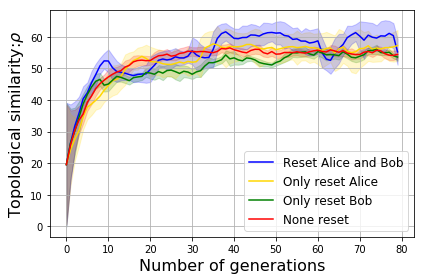

In [45]:
fig_comp = plt.figure(figsize=(6,4))
ax = fig_comp.add_subplot(1,1,1)

x = np.arange(0,MST_none_std.shape[0])
ax.plot(x, MST_both_avg, color='blue',label='Reset Alice and Bob')
ax.plot(x, MST_spke_avg, color='gold',label='Only reset Alice')
ax.plot(x, MST_list_avg, color='green',label='Only reset Bob')
ax.plot(x, MST_none_avg, color='red',label='None reset')

ax.fill_between(x, MST_none_avg - 2*MST_none_std, MST_none_avg+2*MST_none_std, color='red', alpha=0.2)
ax.fill_between(x, MST_list_avg - 2*MST_list_std, MST_list_avg+2*MST_list_std, color='green', alpha=0.2)
ax.fill_between(x, MST_spke_avg - 2*MST_spke_std, MST_spke_avg+2*MST_spke_std, color='gold', alpha=0.2)
ax.fill_between(x, MST_both_avg - 2*MST_both_std, MST_both_avg+2*MST_both_std, color='blue', alpha=0.2)

plt.xlabel('Number of generations',fontsize=16)
plt.ylabel('Topological similarity:'+r'$\rho$',fontsize=16)

#plt.ylim(0,0.92)
ax.legend(fontsize=12)
ax.grid('on')

fig_comp.tight_layout()
fig_comp.savefig('Figures/Msg_types_compare.pdf')